# Regression Analysis on Student Performance

In [1]:
!pip install numpy pandas matplotlib seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

## Load and Inspect Dataset

In [6]:
from google.colab import files
uploaded = files.upload()

import io
data = pd.read_csv(io.BytesIO(uploaded['Student_Performance.csv']))
data.head()

Saving Student_Performance.csv to Student_Performance.csv


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [7]:
print(f"Dataset Shape: {data.shape}")

Dataset Shape: (10000, 6)


## Data Cleaning

In [8]:
data = data.drop_duplicates()
print(f"Shape after removing duplicates: {data.shape}")

Shape after removing duplicates: (9873, 6)


In [9]:
data_cleaned = data.dropna()
print(f"Shape after dropping null values: {data_cleaned.shape}")
print(data_cleaned.isnull().sum())

Shape after dropping null values: (9873, 6)
Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


## Data Visualization

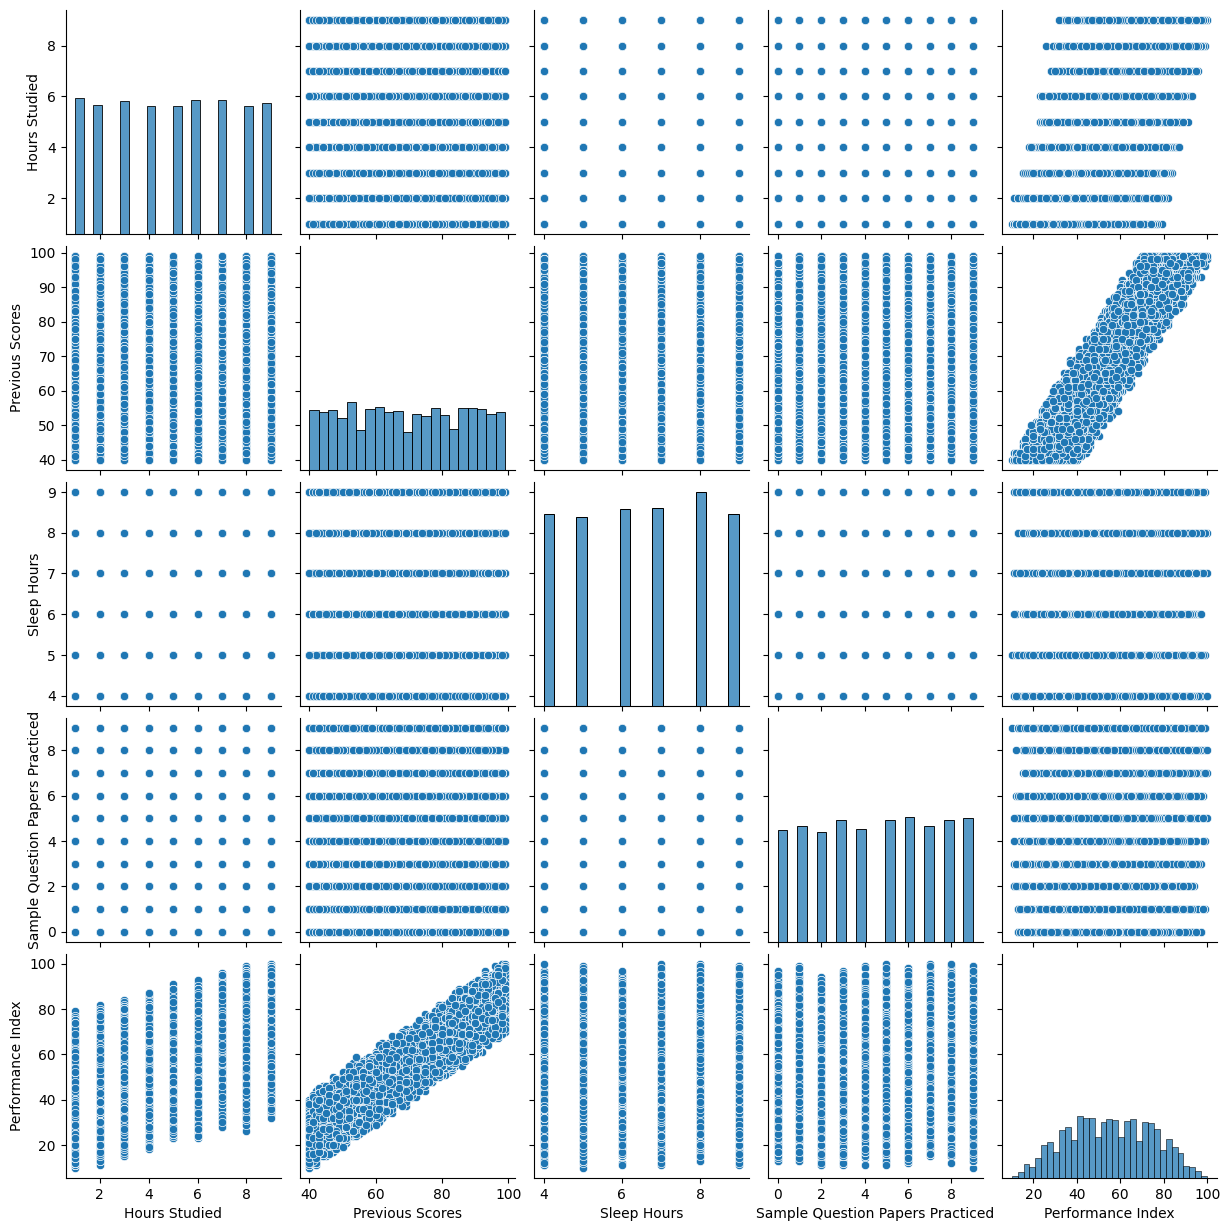

In [10]:
sns.pairplot(data_cleaned)
plt.show()

## Splitting and Encoding Data

In [11]:
X_full = data_cleaned.drop('Performance Index', axis=1)
y_full = data_cleaned['Performance Index']
X_encoded = pd.get_dummies(X_full, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_full, test_size=0.2, random_state=42)

## Experiment 1: Linear Regression

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression MSE: {round(mse_linear, 4)}")
print(f"Linear Regression RMSE: {round(np.sqrt(mse_linear), 4)}")
print(f"Linear Regression R-squared: {round(r2_linear, 4)}")

Linear Regression MSE: 4.3059
Linear Regression RMSE: 2.0751
Linear Regression R-squared: 0.9884


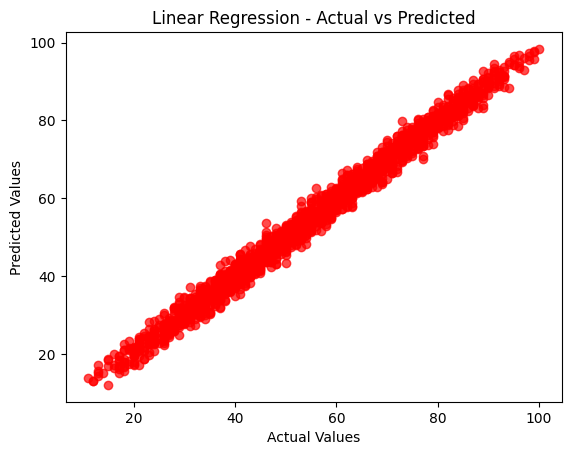

In [16]:
plt.scatter(y_test, y_pred_linear, alpha=0.7, color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression - Actual vs Predicted")
plt.show()

## Experiment 2: Selected Features

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Selecting relevant features and the target
X_selected = data_cleaned[['Hours Studied', 'Previous Scores', 'Sleep Hours']]
y_selected = data_cleaned['Performance Index']

# Splitting the dataset into training and testing sets
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected, y_selected, test_size=0.2, random_state=0)

# Initializing and training the model
selected_model = LinearRegression()
selected_model.fit(X_train_sel, y_train_sel)

# Making predictions
y_pred_sel = selected_model.predict(X_test_sel)

# Calculating evaluation metrics
mse_sel = mean_squared_error(y_test_sel, y_pred_sel)
r2_sel = r2_score(y_test_sel, y_pred_sel)

print(f"Selected Features MSE: {round(mse_sel, 4)}")
print(f"Selected Features RMSE: {round(np.sqrt(mse_sel), 4)}")
print(f"Selected Features R-squared: {round(r2_sel, 4)}")

Selected Features MSE: 4.9026
Selected Features RMSE: 2.2142
Selected Features R-squared: 0.9867


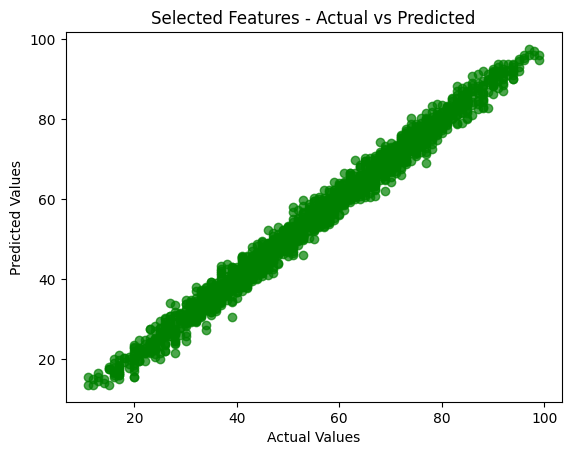

In [19]:
plt.scatter(y_test_sel, y_pred_sel, alpha=0.7, color='green')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Selected Features - Actual vs Predicted")
plt.show()

## Experiment 3: Lasso Regression

In [21]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression MSE: {round(mse_lasso, 4)}")
print(f"Lasso Regression RMSE: {round(np.sqrt(mse_lasso), 4)}")
print(f"Lasso Regression R-squared: {round(r2_lasso, 4)}")

Lasso Regression MSE: 4.4102
Lasso Regression RMSE: 2.1
Lasso Regression R-squared: 0.9881


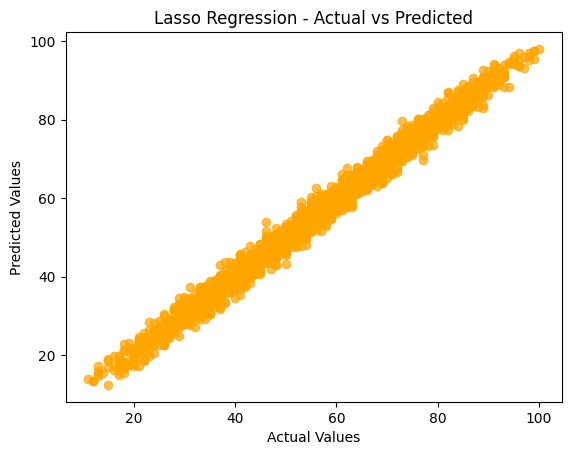

In [23]:
plt.scatter(y_test, y_pred_lasso, alpha=0.7, color='orange')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Lasso Regression - Actual vs Predicted")
plt.show()